
### WorkFlow & Fundamentals

* Prepare Dataset
* make train, train dataset,
* make model
* check the model accurecy

> Add blockquote



In [1]:
import torch
torch.__version__

'2.5.1+cu121'

# Create parameters,

In [2]:
weight= 0.7
bias = 0.3

x = torch.arange(start=0, end=2, step=0.02).unsqueeze(dim=1)
y = weight * x + bias


x[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Make train-test Model

In [3]:
train_split = int(0.8 * len(x))  # 80% of Data,

x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(80, 80, 20, 20)

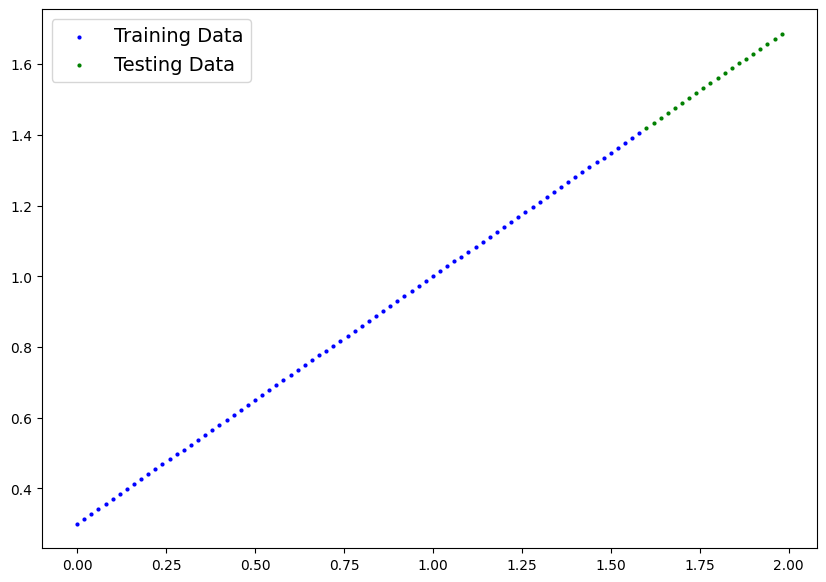

In [4]:
import matplotlib.pyplot as plt

def plot_prediction(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(x_train, y_train, c='b', s=4, label='Training Data')
  plt.scatter(x_test, y_test, c='g', s=4, label='Testing Data')

  if predictions is not None:
    plt.scatter(x_test, predictions, c='r', s=4, label='predictions')

  plt.legend(prop={'size':14})
  plt.show()

plot_prediction()

# Model

In [5]:
class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = torch.nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor):
    return self.weights * x + self.bias


## Cheacking Model

In [6]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### predictions

In [8]:
with torch.inference_mode():
    y_preds = model_0(x_test)

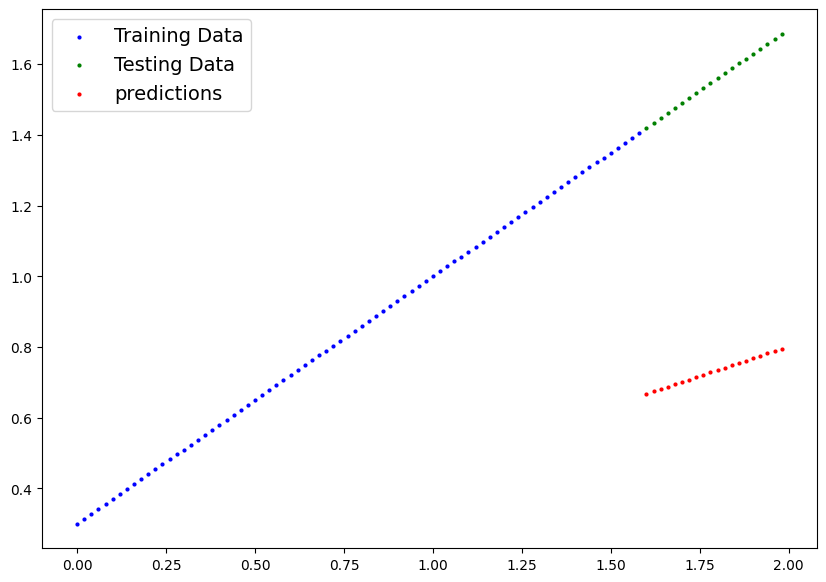

In [9]:
plot_prediction(predictions=y_preds)

In [10]:
loss = y_test - y_preds
loss, loss.shape

(tensor([[0.7525],
         [0.7598],
         [0.7670],
         [0.7743],
         [0.7816],
         [0.7888],
         [0.7961],
         [0.8033],
         [0.8106],
         [0.8179],
         [0.8251],
         [0.8324],
         [0.8397],
         [0.8469],
         [0.8542],
         [0.8615],
         [0.8687],
         [0.8760],
         [0.8833],
         [0.8905]]),
 torch.Size([20, 1]))

# Train Model

In [11]:
loss_fn = torch.nn.L1Loss(size_average=None, reduce=None, reduction='mean')

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

# pyTorch Training Loop

In [28]:
torch.manual_seed(42)

epochs = 100
train_loss_value = []
test_loss_value = []
epochs_count = []

#For an epoch in a range
for i in range(epochs):
  # Call model dot train
  model_0.train()

  # Do the forward pass
  y_preds = model_0(x_train)

  # Calculate the loss
  loss = loss_fn(y_preds, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Lossssss backward
  loss.backward()


  # Optimizer step step step
  optimizer.step()


  # Put the model in evaluation model
  model_0.eval()

  with torch.inference_mode():
    y_preds = model_0(x_test)

    # calculate the loss on test data,
    test_loss = loss_fn(y_preds,y_test)

    if i % 10 ==0:
      epochs_count.append(i)
      train_loss_value.append(loss.detach().numpy())
      test_loss_value.append(test_loss.detach().numpy())
      print(f"Epoch: {epochs} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")






Epoch: 100 | MAE Train Loss: 0.004456821829080582 | MAE Test Loss: 0.043087877333164215 
Epoch: 100 | MAE Train Loss: 0.05086473375558853 | MAE Test Loss: 0.07692267000675201 
Epoch: 100 | MAE Train Loss: 0.02697046659886837 | MAE Test Loss: 0.04024503752589226 
Epoch: 100 | MAE Train Loss: 0.00769685348495841 | MAE Test Loss: 0.001390731311403215 
Epoch: 100 | MAE Train Loss: 0.0024264641106128693 | MAE Test Loss: 0.03279248625040054 
Epoch: 100 | MAE Train Loss: 0.014951243996620178 | MAE Test Loss: 0.022505801171064377 
Epoch: 100 | MAE Train Loss: 0.034881990402936935 | MAE Test Loss: 0.009234207682311535 
Epoch: 100 | MAE Train Loss: 0.03166812285780907 | MAE Test Loss: 0.004807579331099987 
Epoch: 100 | MAE Train Loss: 0.03158498927950859 | MAE Test Loss: 0.0032640458084642887 
Epoch: 100 | MAE Train Loss: 0.03155597299337387 | MAE Test Loss: 0.0027258633635938168 


### Ploting

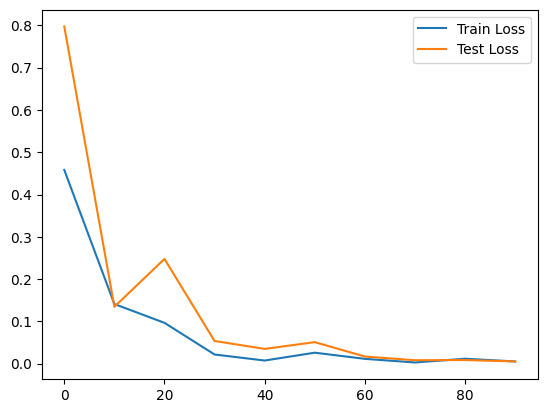

In [13]:
plt.plot(epochs_count, train_loss_value, label="Train Loss")
plt.plot(epochs_count, test_loss_value, label="Test Loss")
plt.xlabel = "epoch"
plt.xlabel = "Loss"
plt.legend()
plt.show()

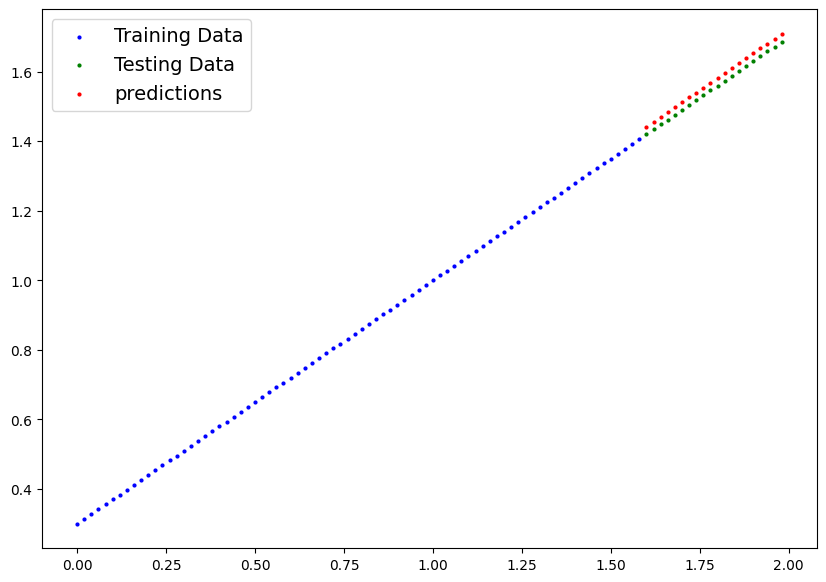

In [14]:
plot_prediction(predictions=y_preds)

# Save Model

In [16]:
from pathlib import Path

# Create Model directory,
Model_Path = Path("Models")
Model_Path.mkdir(parents=True, exist_ok=True)

# create model save path,
model_name = "01_pytorch_workflow_model_0.pth"
model_save_path = Model_Path / model_name

print(f"Saving Model to : {model_save_path}")
torch.save(obj=model_0.state_dict(), f=model_save_path)

Saving Model to : Models/01_pytorch_workflow_model_0.pth


# Loaded Model

In [17]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<ipython-input-17-82eaa2d12617>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [23]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_pred = loaded_model_0(x_train)

# 6.1

In [22]:
import torch

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

x = torch.arange(start, end,step).unsqueeze(dim=1)
y = x*weight+bias

In [23]:
x[:10], x[:10].shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 torch.Size([10, 1]))

In [24]:
y[:10], y[:10].shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([10, 1]))

In [25]:
print(f"Total Data Shape of x : {x.shape}")
print(f"Total Data Shape of y : {y.shape}")

Total Data Shape of x : torch.Size([50, 1])
Total Data Shape of y : torch.Size([50, 1])


## train, test split

In [26]:
train_split = int(len(x)*0.8)  # 80% train data,

x_train,y_train = x[:train_split], y[:train_split]
x_test,y_test = x[train_split:], y[train_split:]

In [27]:
print(f"train_split Data Shape : {train_split}")
print(f"x_train Shape : {x_train.shape}")
print(f"x_test Shape : {x_test.shape}")
print(f"y_train Shape : {y_train.shape}")
print(f"y_test Shape : {y_test.shape}")

train_split Data Shape : 40
x_train Shape : torch.Size([40, 1])
x_test Shape : torch.Size([10, 1])
y_train Shape : torch.Size([40, 1])
y_test Shape : torch.Size([10, 1])


In [38]:
x_train.to(device)
y_train.to(device)
x_test.to(device)
y_test.to(device)


tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]], device='cuda:0')

## Plot Prediction

In [39]:
import matplotlib.pyplot as plt

def plot_prediction1(train_Data=x_train,train_label=y_train, test_Data=x_test,test_label=y_test, predictions=None):
  plt.figure(figsize=(8,7))
  plt.scatter(train_Data,train_label, c='blue', marker="*", s=4, label="Training Data")
  plt.scatter(test_Data, test_label, c='green', marker="*", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_Data, predictions, c='red', marker="+", s=4, label="Prediction Data")

  plt.legend()
  plt.show()

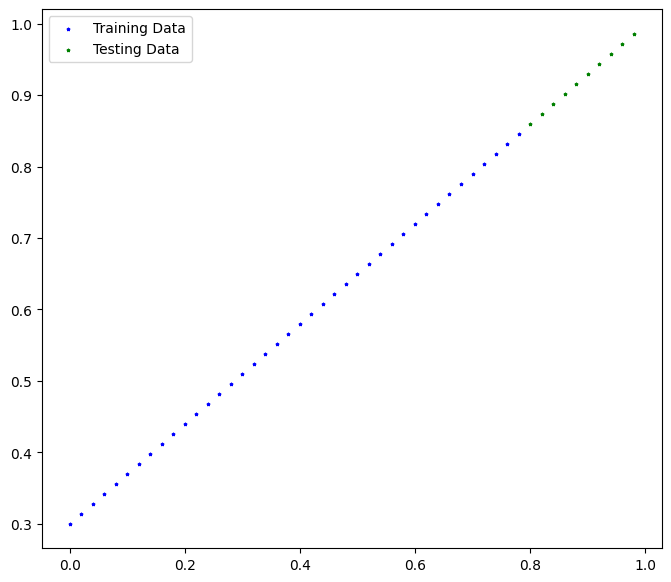

In [40]:
# ploting Data,
plot_prediction1(x_train, y_train, x_test,y_test)

## Model Build

In [41]:
import torch.nn as nn

class LinearRegressionModelV2(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)

    self.Linear_Layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor):
    return self.Linear_Layer(x)


In [42]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

In [43]:
model_1

LinearRegressionModelV2(
  (Linear_Layer): Linear(in_features=1, out_features=1, bias=True)
)

In [44]:
model_1.state_dict()

OrderedDict([('Linear_Layer.weight', tensor([[0.7645]])),
             ('Linear_Layer.bias', tensor([0.8300]))])

## Cheack drvice

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [46]:
next(model_1.parameters()).device

device(type='cpu')

In [48]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## Traing

In [49]:
loss_fn = torch.nn.L1Loss(size_average=None, reduce=None, reduction='mean')

optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.01)

In [54]:
## Traing Loop

epoch = 1000;
# Let's train!
# For an epoch in a range
for e in range(epoch):
  # Call model dot train
  model_1.train()

  # Do the forward pass
  y_preds = model_1(x_train.to(device))

  # Calculate the loss
  loss = loss_fn(y_preds,y_train.to(device))

  # Optimizer zero grad
  optimizer.zero_grad()

  # Lossssss backward
  loss.backward()

  # Optimizer step step step
  optimizer.step()

  # Testing,
  # Call model dot eval
  model_1.eval()

  # With torch inference mode
  with torch.inference_mode():
    test_pred = model_1(x_test.to(device))

    test_loss = loss_fn(test_pred,y_test.to(device))


  if e % 100 == 0:
    print(f"Epoch: {e} | Train loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 100 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


## Making Predictions

In [56]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(x_test.to(device))

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

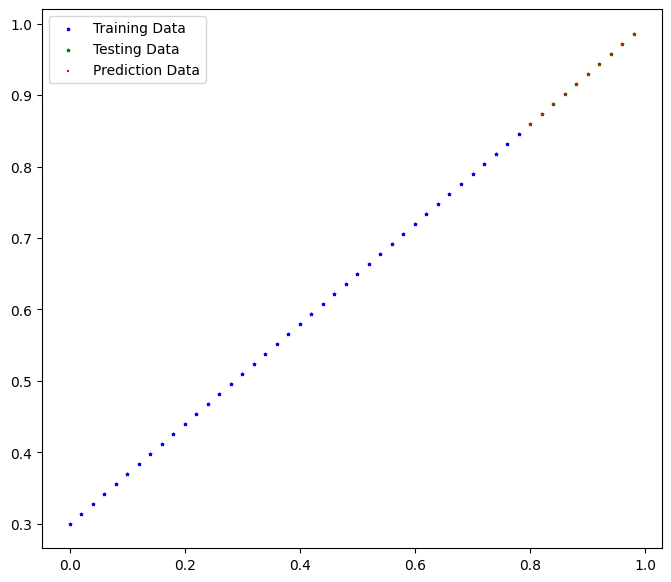

In [59]:
plot_prediction1(predictions=y_preds.cpu())

## Saving Model

In [62]:
from pathlib import Path

Model_Path = Path("models")
Model_Path.mkdir(parents=True, exist_ok=True)

Model_Name = "01_pytorch_workflow_model_1.pth"
Model_Save_Path = Model_Path/Model_Name

torch.save(model_1.state_dict(), Model_Save_Path)

print(f"model Path : {Model_Save_Path}")

model Path : models/01_pytorch_workflow_model_1.pth


## Load Model,

In [70]:
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH, weights_only=True))
# model.eval()

loaded_Model_1 = LinearRegressionModelV2()

loaded_Model_1.state_dict(torch.load(Model_Save_Path))

loaded_Model_1.to(device)

<ipython-input-70-4450ae5a44e2>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_Model_1.state_dict(torch.load(Model_Save_Path))
<ipython-input-70-4450ae5a44e2>:7: Fu

LinearRegressionModelV2(
  (Linear_Layer): Linear(in_features=1, out_features=1, bias=True)
)